<a href="https://colab.research.google.com/github/apollomoon69/ML_covid19_xray_prediction/blob/main/SUB199_BrianMoon_Assignment5_CAP4611.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brian Moon - Kaggle Username: apollomoon

#Python importing duties

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import math
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from PIL import Image
import os
import cv2

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read CSV for image data

In [ ]:
trainDataCSV = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cap-4611-spring-21-assignment-5/assignment5_training_data_metadata.csv")

In [ ]:
trainDataCSV.set_index('id', inplace = True)
trainDataCSV.head(50)
trainDataCSV.shape

(5286, 4)

In [ ]:
trainDataCSV = trainDataCSV.sort_values(by=['image_name'])

In [ ]:
trainDataCSV

,image_name,label,cause,type
id,,,,
5308,01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg,Pnemonia,COVID-19,Virus
5307,1-s2.0-S0140673620303706-fx1_lrg.jpg,Pnemonia,COVID-19,Virus
5306,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,Pnemonia,COVID-19,Virus
5305,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,Pnemonia,COVID-19,Virus
5304,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,Pnemonia,COVID-19,Virus
...,...,...,...,...
5220,streptococcus-pneumoniae-pneumonia-1.jpg,Pnemonia,Streptococcus,bacteria
5219,streptococcus-pneumoniae-pneumonia-temporal-ev...,Pnemonia,Streptococcus,bacteria
5218,streptococcus-pneumoniae-pneumonia-temporal-ev...,Pnemonia,Streptococcus,bacteria


# Convert labels and replace missing data

In [ ]:
trainDataCSV.label.unique()

array(['Pnemonia', 'Normal'], dtype=object)

In [ ]:
trainDataCSV['label'].replace({"Pnemonia": 2, "Normal": 1}, inplace=True)
trainDataCSV.label.fillna(0, inplace=True)
trainDataCSV

,image_name,label,cause,type
id,,,,
5308,01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg,2,COVID-19,Virus
5307,1-s2.0-S0140673620303706-fx1_lrg.jpg,2,COVID-19,Virus
5306,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,2,COVID-19,Virus
5305,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,2,COVID-19,Virus
5304,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,2,COVID-19,Virus
...,...,...,...,...
5220,streptococcus-pneumoniae-pneumonia-1.jpg,2,Streptococcus,bacteria
5219,streptococcus-pneumoniae-pneumonia-temporal-ev...,2,Streptococcus,bacteria
5218,streptococcus-pneumoniae-pneumonia-temporal-ev...,2,Streptococcus,bacteria


In [ ]:
trainDataCSV.cause.unique()

array(['COVID-19', nan, 'SARS', 'ARDS', 'Streptococcus'], dtype=object)

In [ ]:
trainDataCSV.cause.fillna(0, inplace=True)

In [ ]:
trainDataCSV['cause'].replace({'COVID-19': 1, 'SARS': 2, 'ARDS': 3, 'Streptococcus': 4}, inplace=True)
trainDataCSV

,image_name,label,cause,type
id,,,,
5308,01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg,2,1,Virus
5307,1-s2.0-S0140673620303706-fx1_lrg.jpg,2,1,Virus
5306,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,2,1,Virus
5305,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,2,1,Virus
5304,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,2,1,Virus
...,...,...,...,...
5220,streptococcus-pneumoniae-pneumonia-1.jpg,2,4,bacteria
5219,streptococcus-pneumoniae-pneumonia-temporal-ev...,2,4,bacteria
5218,streptococcus-pneumoniae-pneumonia-temporal-ev...,2,4,bacteria


In [ ]:
trainDataCSV.type.unique()

array(['Virus', nan, 'Stress-Smoking', 'bacteria'], dtype=object)

In [ ]:
trainDataCSV.type.fillna(1, inplace=True)
trainDataCSV['type'].replace({'Virus': 2, 'bacteria': 3, 'Stress-Smoking': 4}, inplace=True)
trainDataCSV

,image_name,label,cause,type
id,,,,
5308,01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg,2,1,2
5307,1-s2.0-S0140673620303706-fx1_lrg.jpg,2,1,2
5306,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,2,1,2
5305,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,2,1,2
5304,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,2,1,2
...,...,...,...,...
5220,streptococcus-pneumoniae-pneumonia-1.jpg,2,4,3
5219,streptococcus-pneumoniae-pneumonia-temporal-ev...,2,4,3
5218,streptococcus-pneumoniae-pneumonia-temporal-ev...,2,4,3


In [ ]:
trainDataCSV.isna().sum().sum()

0

In [ ]:
trainDataCSV.size

21144

In [ ]:
testDataCSV = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cap-4611-spring-21-assignment-5/assignment5_test_data_metadata.csv")
testDataCSV.set_index('id', inplace = True)

In [ ]:
labels = []
typeOf = np.asarray(trainDataCSV.type)
labels.append(typeOf)

labels = np.array(labels)
labels = labels.reshape(5286, 1)
labels.shape

(5286, 1)

Categories

In [ ]:
cats = np.array([1, 2, 3, 4])

In [ ]:
get_labels = trainDataCSV.type.to_numpy()

In [ ]:
get_labels

array([2, 2, 2, ..., 3, 3, 3])

In [ ]:
length = len(get_labels)
length

5286

One hot encoding

In [ ]:
new_labels = np.zeros((length, 4))

for i in range(length):
  j = np.where(cats == get_labels[i])
  new_labels[i, j] = 1

new_labels

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

# Read and store training images

Note: There are images that are in the training set, but are not members of the training csv. Therefore, I will treat these as outliers and not include them in my images array

In [ ]:
# from keras.preprocessing.image import load_img
# # from PIL import Image
trainD = []
folder = '/content/drive/MyDrive/Colab Notebooks/cap-4611-spring-21-assignment-5/images/images/train'

stop = 0
images = sorted(os.listdir(folder))
for img in images:
    # stop = stop + 1
    # if(stop == 3):
    #   break
    if(trainDataCSV['image_name'].str.contains(img).any()): 
      image = tf.keras.preprocessing.image.load_img(folder + '/' + img, color_mode='grayscale', target_size=(256,256), interpolation='nearest')
      input_arr = keras.preprocessing.image.img_to_array(image)
      # image = Image.open(folder + '/' + img)
      trainD.append(input_arr) #trainD.append(np.asarray(image))

trainD = np.array(trainD)
trainD.shape
# image.shape

(5286, 256, 256, 1)

In [ ]:
input_arr.shape

(256, 256, 1)

# Model Building

In [ ]:
model = Sequential()
from keras.layers import MaxPooling2D, Dropout
# model.add(Conv2D())
# model.add(Flatten())
# first layer
model.add(Conv2D(16, 4, activation='relu', 
                 input_shape=(256, 256, 1)))
# model.add(Dense(units = 120, activation='relu', input_shape=(4096,)))
# model.add(Dense(units = 10, activation='relu'))

model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding = 'same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding = 'same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.20))
model.add(Flatten())


model.add(Dense(units = 128, activation='relu'))
# model.add(Dropout(0.20))
# model.add(Dense(units = 64, activation='relu'))

# output layer
model.add(Dense(units = 4, activation='softmax'))
# model.add(Dense(units = 4))



# model.add(Dense(4, activation='softmax'))


Compile the model

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Read in test images

In [ ]:
testD = np.zeros((624, 256, 256, 1))
folder = '/content/drive/MyDrive/Colab Notebooks/cap-4611-spring-21-assignment-5/test'

# stop = 0
images2 = sorted(os.listdir(folder))
for img in images2:
    # stop = stop + 1
    # if(stop == 3):
    #   break
    # if(trainDataCSV['image_name'].str.contains(img).any()): 
    image = tf.keras.preprocessing.image.load_img(folder + '/' + img, color_mode='grayscale', target_size=(256,256),
    interpolation='nearest')
    input_arr = keras.preprocessing.image.img_to_array(image)
    # image = Image.open(folder + '/' + img)
    # testD.append(input_arr) 
    number = testDataCSV[testDataCSV['image_name'] == img].index[0] - 5309
    # print(number)
    testD[number] = input_arr 
    #trainD.append(np.asarray(image))
    # print(folder + '/' + img)
testD = np.array(testD)
# testD = testD.reshape(5286, 4096)
testD.shape

(624, 256, 256, 1)

Lets split the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(trainD, new_labels, test_size = 0.20, random_state = 42)

Lets transform and normalize the data

In [ ]:
# augmented training data
trainD_AUG = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. /255, zoom_range=0.2, shear_range=0.2, horizontal_flip=True, vertical_flip=True)
train = trainD_AUG.flow(
    x_train,
    y=y_train,
    batch_size=32,
    shuffle=True,
    sample_weight=None,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset=None,
)

In [ ]:
# train[0]

In [ ]:
# augmented validation data
valD_AUG = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. /255, zoom_range=0.2, shear_range=0.2, horizontal_flip=True, vertical_flip=True)
validation = valD_AUG.flow(
    x_test,
    y=y_test,
    batch_size=32,
    shuffle=True,
    sample_weight=None,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset=None,
)

In [ ]:
trainD.shape
trainD_norm = trainD / 255

In [ ]:
new_labels.shape

(5286, 4)

In [ ]:
new_labels

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

# Run the model

In [ ]:
# model.fit(trainD, new_labels, validation_split=0.2, epochs=10)
history = model.fit(train, validation_data=validation, epochs=30)

Epoch 1/30
133/133 [==============================] - 57s 179ms/step - loss: 1.0149 - accuracy: 0.5048 - val_loss: 0.6986 - val_accuracy: 0.6871
Epoch 2/30
133/133 [==============================] - 24s 177ms/step - loss: 0.7026 - accuracy: 0.7004 - val_loss: 0.6573 - val_accuracy: 0.7193
Epoch 3/30
133/133 [==============================] - 23s 176ms/step - loss: 0.6534 - accuracy: 0.7131 - val_loss: 0.7033 - val_accuracy: 0.6692
Epoch 4/30
133/133 [==============================] - 23s 177ms/step - loss: 0.6387 - accuracy: 0.7247 - val_loss: 0.6562 - val_accuracy: 0.7117
Epoch 5/30
133/133 [==============================] - 24s 178ms/step - loss: 0.6556 - accuracy: 0.7078 - val_loss: 0.5525 - val_accuracy: 0.7741
Epoch 6/30
133/133 [==============================] - 24s 179ms/step - loss: 0.5908 - accuracy: 0.7475 - val_loss: 0.5823 - val_accuracy: 0.7448
Epoch 7/30
133/133 [==============================] - 23s 175ms/step - loss: 0.5731 - accuracy: 0.7478 - val_loss: 0.5486 - val_ac

In [ ]:
testD_norm = testD / 255
testD_norm

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.00392157]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.42352941],
         [0.43137255],
         [0.44313725],
         ...,
         [0.48235294],
         [0.44705882],
         [0.43921569]],

        [[0.43529412],
         [0.39607843],
         [0.40784314],
         ...,
         [0.47058824],
         [0.44705882],
         [0.43921569]],

        [[0.41960784],
         [0.40392157],
         [0.42352941],
         ...,
         [0.47843137],
         [0.45490196],
         [0.42352941]]],


       [[[0.10196078],
         [0.10980392],
         [0.10

Model evaluation - Accuracy: 0.7930

In [ ]:
model.evaluate(validation)

34/34 [==============================] - 4s 130ms/step - loss: 0.4830 - accuracy: 0.7930


[0.4829925000667572, 0.793005645275116]

In [ ]:
predictions = model.predict(testD_norm)

Plotting graphs to view how the models are performing 

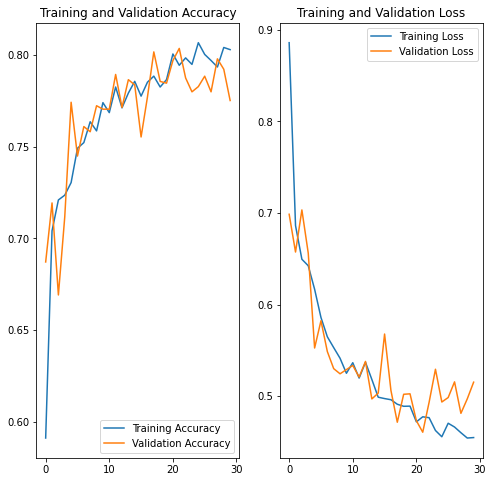

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions

array([[8.6234611e-01, 1.1968990e-01, 1.7920727e-02, 4.3327749e-05],
       [6.6812140e-01, 1.6204889e-01, 1.6982123e-01, 8.5225602e-06],
       [8.1161821e-01, 7.8390889e-02, 1.0998297e-01, 7.9423480e-06],
       ...,
       [1.7885496e-03, 5.8167386e-01, 4.1652694e-01, 1.0625587e-05],
       [1.0394660e-02, 6.3716590e-01, 3.5220486e-01, 2.3452443e-04],
       [1.5986245e-04, 4.4309750e-01, 5.5666763e-01, 7.5082891e-05]],
      dtype=float32)

In [ ]:
predictions[1]

array([6.6812140e-01, 1.6204889e-01, 1.6982123e-01, 8.5225602e-06],
      dtype=float32)

# Store predictions

In [ ]:
predicts = []
print(len(predictions))
for i in range(len(predictions)):
  winner = np.where(predictions[i] == np.amax(predictions[i]))
  predicts.append(winner[0][0] + 1)

predicts

624


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,


# Output to CSV

In [ ]:
output = pd.DataFrame({'id': testDataCSV.index, 'type': predicts})
# output = pd.DataFrame({'id': testDataCSV.index, 'type': predictions.astype(int)})
# output = pd.DataFrame({'id': testDataCSV.index, 'type': predictions.astype(int)})
output.to_csv('my_submission.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
# labels = labels.flatten()
labels.shape

(5286, 1)

In [ ]:
trainD.shape

(5286, 256, 256, 1)

# Output predictions

In [ ]:
pd.set_option('display.max_rows', 100000)
output

,id,type
0,5309,1
1,5310,1
2,5311,1
3,5312,1
4,5313,1
5,5314,1
6,5315,1
7,5316,1
8,5317,1
9,5318,1


In [ ]:
output.type

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     2
17     3
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     3
37     1
38     1
39     1
40     1
41     1
42     1
43     2
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     3
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     3
90     1
91     3
92     1
93     1
94     1
95     2
96     1
97     1
98     1
99     1
100    1
101    1
102    3
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

Brian Moon - Kaggle Username: apollomoon